## Algoritmos
*   **SVM**: Bom para dados com alta dimensionalidade e poucas amostras
*   **Naive-bayes**: Geralmente bom para sentiment analysis, porém mais efetivo para datasets grandes
*   **Random Forest**: Bom para lidar com overfitting, efetivo para datasets grandes
*   **K-nearest neighbors**: Simples e bom para datasets que não são muito grandes, e os limiares de decisão não são regulares

---

*   **XGBoost**: Boa acurácia e precisão geralmente, versátil para vários tipos de dados.
*   **Convolutional neural network (CNN)**: Podem capturar padrões complexos nos dados
*   **BERT**: Capturam contexto locais e a longa distância com efetividade

## Lembretes
* Random state = 42
* Utilizar train test split de (70, 30)
* Realizar normalização dos dados (após a separação de dataset de treino e de teste): inst_scaler = preprocessing.StandardScaler(with_mean=False)


## Importando o arquivo pré-processado

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
%cd "gdrive/MyDrive/Grupo 1 - Processamento de Linguagem Natural/filmes catalogados csvs/"

Mounted at /content/gdrive
/content/gdrive/MyDrive/Grupo 1 - Processamento de Linguagem Natural/filmes catalogados csvs


In [ ]:
%ls

 aaaaaaaaaaaa.csv                     leticia-metacritic-data.csv
 augusto-metacritic-data.csv          preprocessed-metacritics.csv
 badib-metacritic-data.csv           'preprocessed-metacritics-total (1).csv'
 badib-preprocessed-metacritics.csv   preprocessed-metacritics-total.csv
 Demi_scraping.csv                    Ricardo-Metacritic-Data.csv


In [ ]:
df = pd.read_csv("preprocessed-metacritics-total (1).csv")
df

,Movie name,Review,Created at,Score,Genre
0,Arrival,"['denis', 'villeneuve', 'shows', 'us', 'all', ...","OCT 3, 2022",1.0,Mistery
1,Arrival,"['amy', 'adams', 'gives', 'a', 'superb', 'perf...","MAR 7, 2022",1.0,Mistery
2,Arrival,"['this', 'movie', 'is', 'not', 'for', 'everyon...","DEC 6, 2019",1.0,Mistery
3,Arrival,"['arrival', 'is', 'one', 'of', 'my', 'favorite...","APR 3, 2020",1.0,Mistery
4,Arrival,"['i', 'do', 'not', 'think', 'this', 'movie', '...","MAR 2, 2020",1.0,Mistery
...,...,...,...,...,...
6475,Norm of the North,"['ugh', 'anything', 'but', 'this', 'movie', 'i...","APR 3, 2021",-1.0,Animation
6476,Norm of the North,"['this', 'is', 'a', 'pathetic', 'attempt', 'at...","JUL 9, 2016",-1.0,Animation
6477,Star Wars: The Clone Wars,"['this', 'movie', 'was', 'never', 'interesting...","AUG 2, 2011",-1.0,Animation
6478,Norm of the North,"['this', 'is', 'even', 'a', 'movie', 'i', 'tho...","JUN 25, 2016",-1.0,Animation


## Remoção de stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd

#nltk.download('punkt')

# Function to remove stopwords
def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in words if word.lower() not in stop_words])


# Apply the function to the "review" column
df['review_no_stopwords'] = df['Review'].map(remove_stopwords)

# Display the DataFrame
df


,Movie name,Review,Created at,Score,Genre,review_no_stopwords
0,Rogue One: A Star Wars Story,"['if', 'i', 'am', 'looking', 'at', 'this', 'mo...","MAY 5, 2022",1,Fantasy,"[ ' f ' , ' ' , ' ' , ' l k n g ' , ' ..."
1,Rogue One: A Star Wars Story,"['a', 'stunning', 'masterpiece', 'which', 'fra...","SEP 5, 2022",1,Fantasy,"[ ' ' , ' u n n n g ' , ' e r p e c e ' , ..."
2,Rogue One: A Star Wars Story,"['rogue', 'one', 'a', 'star', 'wars', 'story',...","NOV 27, 2022",1,Fantasy,"[ ' r g u e ' , ' n e ' , ' ' , ' r ' , ..."
3,Rogue One: A Star Wars Story,"['i', 'like', 'this', 'movie', 'more', 'than',...","AUG 30, 2022",1,Fantasy,"[ ' ' , ' l k e ' , ' h ' , ' v e ' , ..."
4,Rogue One: A Star Wars Story,"['this', 'movie', 'is', 'very', 'nice', 'and',...","OCT 2, 2022",1,Fantasy,"[ ' h ' , ' v e ' , ' ' , ' v e r ' , ..."
...,...,...,...,...,...,...
1615,Fifty Shades of Grey,"['already', 'on', 'first', 'five', 'minutes', ...","SEP 12, 2018",-1,Thriller,"[ ' l r e ' , ' n ' , ' f r ' , ' f v e ..."
1616,Fifty Shades of Grey,"['the', 'worst', 'movie', 'i', 'have', 'ever',...","MAY 5, 2016",-1,Thriller,"[ ' h e ' , ' w r ' , ' v e ' , ' ' , ..."
1617,Fifty Shades of Grey,"['the', 'story', 'is', 'lazy', 'the', 'premise...","FEB 25, 2017",-1,Thriller,"[ ' h e ' , ' r ' , ' ' , ' l z ' , ' ..."
1618,Fifty Shades of Grey,"['test', 'review', 'ignore', 'it']","JUN 26, 2016",-1,Thriller,"[ ' e ' , ' r e v e w ' , ' g n r e ' , ..."


In [ ]:
pip install spacy


In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def remove_stopwords(words):
    doc = nlp(' '.join(words))
    return [token.text for token in doc if not token.is_stop]

df['aaa'] = df['Review'].apply(remove_stopwords)

In [ ]:
df

,Movie name,Review,Created at,Score,Genre,review_no_stopwords,aaa
0,Rogue One: A Star Wars Story,"['if', 'i', 'am', 'looking', 'at', 'this', 'mo...","MAY 5, 2022",1,Fantasy,"[ ' f ' , ' ' , ' ' , ' l k n g ' , ' ...","[[, ', f, ', ,, , ', ', ,, , ', m, ', ,, ..."
1,Rogue One: A Star Wars Story,"['a', 'stunning', 'masterpiece', 'which', 'fra...","SEP 5, 2022",1,Fantasy,"[ ' ' , ' u n n n g ' , ' e r p e c e ' , ...","[[, ', ', ,, , ', s, t, u, n, n, n, g, ', ,,..."
2,Rogue One: A Star Wars Story,"['rogue', 'one', 'a', 'star', 'wars', 'story',...","NOV 27, 2022",1,Fantasy,"[ ' r g u e ' , ' n e ' , ' ' , ' r ' , ...","[[, ', r, o, g, u, e, ', ,, , ', o, n, e, ',..."
3,Rogue One: A Star Wars Story,"['i', 'like', 'this', 'movie', 'more', 'than',...","AUG 30, 2022",1,Fantasy,"[ ' ' , ' l k e ' , ' h ' , ' v e ' , ...","[[, ', ', ,, , ', l, k, e, ', ,, , ', t, h..."
4,Rogue One: A Star Wars Story,"['this', 'movie', 'is', 'very', 'nice', 'and',...","OCT 2, 2022",1,Fantasy,"[ ' h ' , ' v e ' , ' ' , ' v e r ' , ...","[[, ', t, h, s, ', ,, , ', m, o, v, e, ', ,,..."
...,...,...,...,...,...,...,...
1615,Fifty Shades of Grey,"['already', 'on', 'first', 'five', 'minutes', ...","SEP 12, 2018",-1,Thriller,"[ ' l r e ' , ' n ' , ' f r ' , ' f v e ...","[[, ', l, r, e, d, y, ', ,, , ', o, n, ', ,,..."
1616,Fifty Shades of Grey,"['the', 'worst', 'movie', 'i', 'have', 'ever',...","MAY 5, 2016",-1,Thriller,"[ ' h e ' , ' w r ' , ' v e ' , ' ' , ...","[[, ', t, h, e, ', ,, , ', w, o, r, s, t, ',..."
1617,Fifty Shades of Grey,"['the', 'story', 'is', 'lazy', 'the', 'premise...","FEB 25, 2017",-1,Thriller,"[ ' h e ' , ' r ' , ' ' , ' l z ' , ' ...","[[, ', t, h, e, ', ,, , ', s, t, o, r, y, ',..."
1618,Fifty Shades of Grey,"['test', 'review', 'ignore', 'it']","JUN 26, 2016",-1,Thriller,"[ ' e ' , ' r e v e w ' , ' g n r e ' , ...","[[, ', t, e, s, t, ', ,, , ', r, e, v, e, w,..."


#Perdi a paciência com as stop words, vou fingir que elas não existem

## Wordcloud

In [ ]:
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


In [ ]:

# Improved text preprocessing
def preprocess_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lower case
    return text.lower()

# função para a geração da wordcloud
def create_wordcloud(amostras, sentimento):
    movie_context = ["movie", "film", "character", "characters", "also", "first", "make", "could", "thing", "one", "time", "would", "acting", "like", "plot", "really", "story", "about", "scene"]
    stopwords = nltk.corpus.stopwords.words('english')+movie_context
    text = " ".join(preprocess_text(cat) for cat in amostras)
    word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="white",
        collocations=False,
       # colormap=font_color,
        stopwords=stopwords,
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {score}')
    plt.axis('off')
    plt.show()

In [ ]:
for genre in df['Genre'].unique():
    genre_df = df[df['Genre'] == genre]
    create_wordcloud(genre_df['Review'], genre)

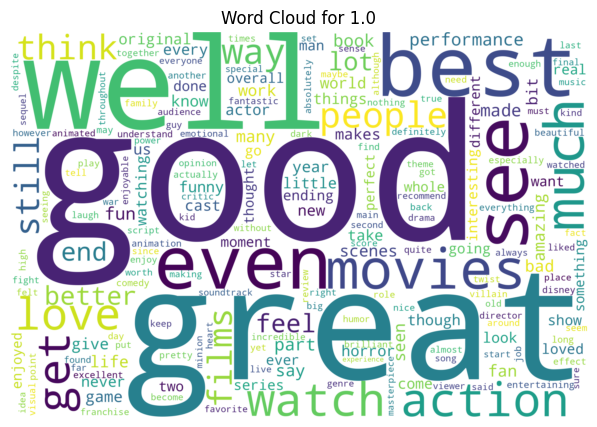

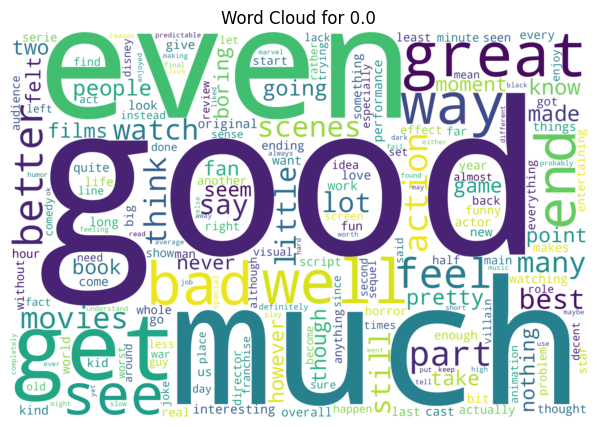

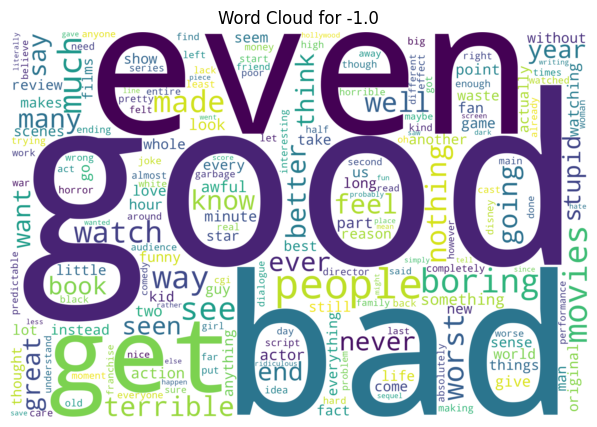

In [ ]:
for score in df['Score'].unique():
    score_df = df[df['Score'] == score]
    create_wordcloud(score_df['Review'], score)

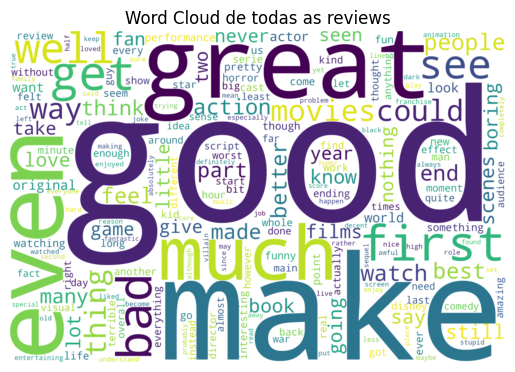

In [ ]:
# Usage
import matplotlib.pyplot as plt
word_cloud_image = create_wordcloud(df['Review'], 'Review', color='white')

# Plot
plt.imshow(word_cloud_image, interpolation='bilinear')
plt.title('Word Cloud de todas as reviews')
plt.axis('off')
plt.show()

In [ ]:
condition = df['Genre'] == 'Horror'
df_fant = df[condition]

df_fant.head()

,Movie name,Review,Created at,Score,Genre
990,Hereditary,"['this', 'is', 'an', 'interesting', 'debut', '...","NOV 1, 2021",1.0,Horror
991,Hereditary,"['a', 'psychological', 'and', 'tense', 'horror...","DEC 2, 2020",1.0,Horror
992,Hereditary,"['hereditary', 'is', 'without', 'a', 'doubt', ...","NOV 8, 2023",1.0,Horror
993,Hereditary,"['i', 'enjoyed', 'this', 'movie', 'apart', 'fr...","APR 26, 2022",1.0,Horror
994,Hereditary,"['hereditary', 'is', 'a', 'breakout', 'film', ...","OCT 31, 2023",1.0,Horror


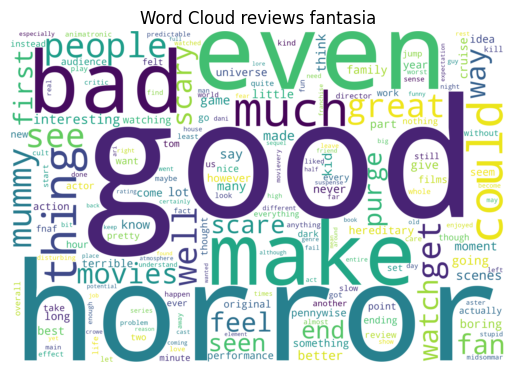

In [ ]:
word_cloud_image = create_wordcloud(df_fant['Review'], 'Review', color='white')

# Plot
plt.imshow(word_cloud_image, interpolation='bilinear')
plt.title('Word Cloud reviews fantasia')
plt.axis('off')
plt.show()

In [ ]:
df_good = df[df['Score']==1]
df_medium = df[df['Score']==0]
df_bad = df[df['Score']==-1]

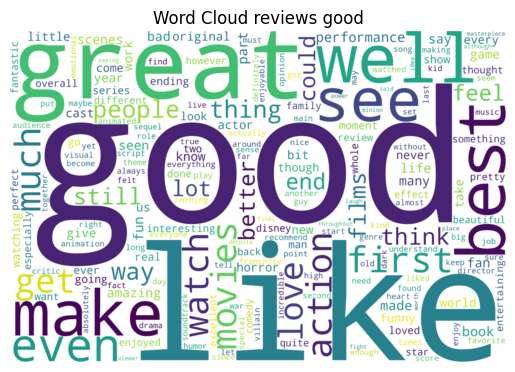

In [ ]:
word_cloud_image = create_wordcloud(df_good['Review'], 'Review', color='white')

# Plot
plt.imshow(word_cloud_image, interpolation='bilinear')
plt.title('Word Cloud reviews good')
plt.axis('off')
plt.show()

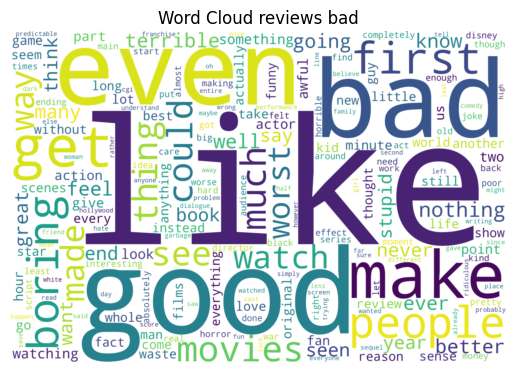

In [ ]:
word_cloud_image = create_wordcloud(df_bad['Review'], 'Review', color='white')

# Plot
plt.imshow(word_cloud_image, interpolation='bilinear')
plt.title('Word Cloud reviews bad')
plt.axis('off')
plt.show()

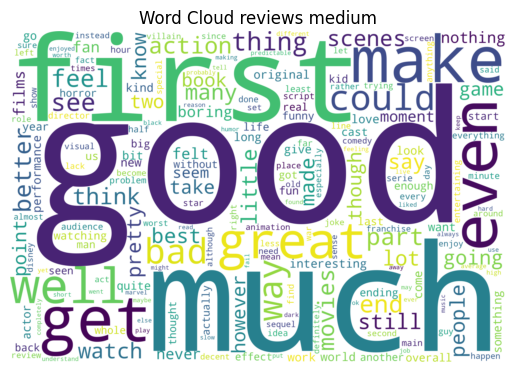

In [ ]:
word_cloud_image = create_wordcloud(df_medium['Review'], 'Review', color='white')

# Plot
plt.imshow(word_cloud_image, interpolation='bilinear')
plt.title('Word Cloud reviews medium')
plt.axis('off')
plt.show()

In [ ]:
def create_wordcloud(amostras, sentimento, color="blue",font_color="viridis"):
   # name_candidates = ["simone", "tebet", "simonetebetbr", "lula", "bolsonaro", "ciro", "temer", "lulaOficial","bozo","jair","pt","brasil","presidente"]
   # manual_stopwords = ["user","url","hashtag","<",">","eleição","política","turno","voto","votar","vota","votos","governo","pessoa","pessoas","deu","fala","falar","falando","povo","debate","pra","vc","vai","aí","ter","ver","pro","cara","vou","ta","q","tá","todo","gente","vcs","tudo","alguém","agora","ou","fez","ainda","antes","coisa","to","tô","não","sim","de", "no", "por", "para", "com", "sobre", "entre", "em", "através", "durante", "antes", "depois de", "acima", "abaixo", "para", "desde", "acima", "abaixo", "em", "fora", "sobre", "sobre", "sob", "de novo", "avançar", "então", "aqui", "lá", "quando", "onde", "pq", "como", "todos", "qualquer", "ambos", "cada", "alguns", "mais", "maioria", "outros", "alguns", "nem", "não", "apenas", "ter", "mesmo", "que", "também"]
   # const_words = ['o','e', 'a', 'à', 'adeus', 'agora', 'aí', 'ainda', 'além', 'algo', 'alguém', 'algum', 'alguma', 'algumas', 'alguns', 'ali', 'ampla', 'amplas', 'amplo', 'amplos', 'ano', 'anos', 'ante', 'antes', 'ao', 'aos', 'apenas', 'apoio', 'após', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aqui', 'aquilo', 'área', 'as', 'às', 'assim', 'até', 'atrás', 'através', 'baixo', 'bastante', 'bem', 'boa', 'boas', 'bom', 'bons', 'breve', 'cá', 'cada', 'catorze', 'cedo', 'cento', 'certamente', 'certeza', 'cima', 'cinco', 'coisa', 'coisas', 'com', 'como', 'conselho', 'contra', 'contudo', 'custa', 'da', 'dá', 'dão', 'daquela', 'daquelas', 'daquele', 'daqueles', 'dar', 'das', 'de', 'debaixo', 'dela', 'delas', 'dele', 'deles', 'demais', 'dentro', 'depois', 'desde', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'destas', 'deste', 'destes', 'deve', 'devem', 'devendo', 'dever', 'deverá', 'deverão', 'deveria', 'deveriam', 'devia', 'deviam', 'dez', 'dezanove', 'dezasseis', 'dezassete', 'dezoito', 'dia', 'diante', 'disse', 'disso', 'disto', 'dito', 'diz', 'dizem', 'dizer', 'do', 'dois', 'dos', 'doze', 'duas', 'dúvida', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'embora', 'enquanto', 'entre', 'era', 'eram', 'éramos', 'és', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estás', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estiveste', 'estivestes', 'estou', 'etc', 'eu', 'exemplo', 'faço', 'falta', 'favor', 'faz', 'fazeis', 'fazem', 'fazemos', 'fazendo', 'fazer', 'fazes', 'feita', 'feitas', 'feito', 'feitos', 'fez', 'fim', 'final', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'forma', 'formos', 'fosse', 'fossem', 'fôssemos', 'foste', 'fostes', 'fui', 'geral', 'grande', 'grandes', 'grupo', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'havia', 'hei', 'hoje', 'hora', 'horas', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvéssemos', 'isso', 'isto', 'já', 'la', 'lá', 'lado', 'lhe', 'lhes', 'lo', 'local', 'logo', 'longe', 'lugar', 'maior', 'maioria', 'mais', 'mal', 'mas', 'máximo', 'me', 'meio', 'menor', 'menos', 'mês', 'meses', 'mesma', 'mesmas', 'mesmo', 'mesmos', 'meu', 'meus', 'mil', 'minha', 'minhas', 'momento', 'muita', 'muitas', 'muito', 'muitos', 'na', 'nada', 'não', 'naquela', 'naquelas', 'naquele', 'naqueles', 'nas', 'nem', 'nenhum', 'nenhuma', 'nessa', 'nessas', 'nesse', 'nesses', 'nesta', 'nestas', 'neste', 'nestes', 'ninguém', 'nível', 'no', 'noite', 'nome', 'nos', 'nós', 'nossa', 'nossas', 'nosso', 'nossos', 'nova', 'novas', 'nove', 'novo', 'novos', 'num', 'numa', 'número', 'nunca', 'o', 'obra', 'obrigada', 'obrigado', 'oitava', 'oitavo', 'oito', 'onde', 'ontem', 'onze', 'os', 'ou', 'outra', 'outras', 'outro', 'outros', 'para', 'parece', 'parte', 'partir', 'paucas', 'pela', 'pelas', 'pelo', 'pelos', 'pequena', 'pequenas', 'pequeno', 'pequenos', 'per', 'perante', 'perto', 'pode', 'pude', 'pôde', 'podem', 'podendo', 'poder', 'poderia', 'poderiam', 'podia', 'podiam', 'põe', 'põem', 'pois', 'ponto', 'pontos', 'por', 'porém', 'porque', 'porquê', 'posição', 'possível', 'possivelmente', 'posso', 'pouca', 'poucas', 'pouco', 'poucos', 'primeira', 'primeiras', 'primeiro', 'primeiros', 'própria', 'próprias', 'próprio', 'próprios', 'próxima', 'próximas', 'próximo', 'próximos', 'pude', 'puderam', 'quais', 'quáis', 'qual', 'quando', 'quanto', 'quantos', 'quarta', 'quarto', 'quatro', 'que', 'quê', 'quem', 'quer', 'quereis', 'querem', 'queremas', 'queres', 'quero', 'questão', 'quinta', 'quinto', 'quinze', 'relação', 'sabe', 'sabem', 'são', 'se', 'segunda', 'segundo', 'sei', 'seis', 'seja', 'sejam', 'sejamos', 'sem', 'sempre', 'sendo', 'ser', 'será', 'serão', 'serei', 'seremos', 'seria', 'seriam', 'seríamos', 'sete', 'sétima', 'sétimo', 'seu', 'seus', 'sexta', 'sexto', 'si', 'sido', 'sim', 'sistema', 'só', 'sob', 'sobre', 'sois', 'somos', 'sou', 'sua', 'suas', 'tal', 'talvez', 'também', 'tampouco', 'tanta', 'tantas', 'tanto', 'tão', 'tarde', 'te', 'tem', 'tém', 'têm', 'temos', 'tendes', 'tendo', 'tenha', 'tenham', 'tenhamos', 'tenho', 'tens', 'ter', 'terá', 'terão', 'terceira', 'terceiro', 'terei', 'teremos', 'teria', 'teriam', 'teríamos', 'teu', 'teus', 'teve', 'ti', 'tido', 'tinha', 'tinham', 'tínhamos', 'tive', 'tivemos', 'tiver', 'tivera', 'tiveram', 'tivéramos', 'tiverem', 'tivermos', 'tivesse', 'tivessem', 'tivéssemos', 'tiveste', 'tivestes', 'toda', 'todas', 'todavia', 'todo', 'todos', 'trabalho', 'três', 'treze', 'tu', 'tua', 'tuas', 'tudo', 'última', 'últimas', 'último', 'últimos', 'um', 'uma', 'umas', 'uns', 'vai', 'vais', 'vão', 'vários', 'vem', 'vêm', 'vendo', 'vens', 'ver', 'vez', 'vezes', 'viagem', 'vindo', 'vinte', 'vir', 'você', 'vocês', 'vos', 'vós', 'vossa', 'vossas', 'vosso', 'vossos', 'zero', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '_' ]
    stopwords = nltk.corpus.stopwords.words('english') #+name_candidates+manual_stopwords+const_words
    print(stopwords)
    text = " ".join(cat for cat in amostras)
    word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color=color,
        collocations=False,
        colormap=font_color,
        stopwords=stopwords,

    ).generate(text)

    return word_cloud.to_array()  # Convert WordCloud object to a NumPy array (image)

## Algoritmos

In [ ]:
## testando aqui com o arquivo contendo todos os gêneros
df_geral = pd.read_csv("preprocessed-metacritics-total.csv")
len(df_geral)

6480

In [ ]:
df_geral.head()

,Movie name,Review,Created at,Score,Genre
0,Rogue One: A Star Wars Story,"['if', 'i', 'am', 'looking', 'at', 'this', 'mo...","MAY 5, 2022",1.0,Fantasy
1,Rogue One: A Star Wars Story,"['a', 'stunning', 'masterpiece', 'which', 'fra...","SEP 5, 2022",1.0,Fantasy
2,Rogue One: A Star Wars Story,"['rogue', 'one', 'a', 'star', 'wars', 'story',...","NOV 27, 2022",1.0,Fantasy
3,Rogue One: A Star Wars Story,"['i', 'like', 'this', 'movie', 'more', 'than',...","AUG 30, 2022",1.0,Fantasy
4,Rogue One: A Star Wars Story,"['this', 'movie', 'is', 'very', 'nice', 'and',...","OCT 2, 2022",1.0,Fantasy


### Separação em conjuntos de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

# Load a dataset (for example, the Iris dataset)
X = df_geral['Review']
y = df_geral['Score']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train data: ', X_train.shape, y_train.shape)
print('Test data: ', X_test.shape, y_test.shape)

Train data:  (4536,) (4536,)
Test data:  (1944,) (1944,)


### Usando o TF-IDF Vectorizer e mantendo a separação dos conjuntos de treino e teste

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tf_vectorizer = TfidfVectorizer()

# criando conjuntos de teste e treinamento com o vectorizer do tfidf
X_train_tfidf = Tf_vectorizer.fit_transform(X_train)
X_test_tfidf = Tf_vectorizer.transform(X_test)

print('Train data: ', X_train_tfidf.shape)
print('Test data: ', X_test_tfidf.shape)

Train data:  (4536, 20189)
Test data:  (1944, 20189)


In [ ]:
####### ignorando o scaler porque, aparentemente, ele não agrega muito depois de ter usado o vectorizer (ele mesmo já normaliza os valores)
from sklearn.preprocessing import StandardScaler

# It's a good practice to scale features for algorithms like SVM and KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_tfidf)
X_test = scaler.transform(X_test_tfidf)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# SVM Classifier
svm_clf = SVC()
svm_clf.fit(X_train_tfidf, y_train)
svm_predictions = svm_clf.predict(X_test_tfidf)
print("SVM Accuracy:", classification_report(y_test, svm_predictions))

SVM Accuracy:               precision    recall  f1-score   support

        -1.0       0.73      0.71      0.72       643
         0.0       0.56      0.65      0.60       622
         1.0       0.78      0.69      0.73       679

    accuracy                           0.68      1944
   macro avg       0.69      0.68      0.68      1944
weighted avg       0.69      0.68      0.69      1944



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Classifier
nb_clf = GaussianNB()
nb_clf.fit((X_train_tfidf).toarray(), y_train)
nb_predictions = nb_clf.predict(X_test_tfidf.toarray())
print("Naive Bayes Accuracy:", classification_report(y_test, nb_predictions))

Naive Bayes Accuracy:               precision    recall  f1-score   support

        -1.0       0.48      0.45      0.47       643
         0.0       0.41      0.40      0.41       622
         1.0       0.51      0.56      0.54       679

    accuracy                           0.47      1944
   macro avg       0.47      0.47      0.47      1944
weighted avg       0.47      0.47      0.47      1944



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_tfidf, y_train)
rf_predictions = rf_clf.predict(X_test_tfidf)
print("Random Forest Accuracy:", classification_report(y_test, rf_predictions))

Random Forest Accuracy:               precision    recall  f1-score   support

        -1.0       0.70      0.70      0.70       643
         0.0       0.54      0.59      0.57       622
         1.0       0.69      0.64      0.66       679

    accuracy                           0.64      1944
   macro avg       0.64      0.64      0.64      1944
weighted avg       0.65      0.64      0.64      1944



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_tfidf, y_train)
knn_predictions = knn_clf.predict(X_test_tfidf)
print("KNN Accuracy:", classification_report(y_test, knn_predictions))

KNN Accuracy:               precision    recall  f1-score   support

        -1.0       0.60      0.25      0.35       643
         0.0       0.42      0.24      0.31       622
         1.0       0.42      0.82      0.56       679

    accuracy                           0.44      1944
   macro avg       0.48      0.44      0.40      1944
weighted avg       0.48      0.44      0.41      1944

